In [2]:
# d3 利用 matplotlib 分析知乎文章相关数据并制作可视化图表
import pandas as pd
from matplotlib import pyplot as plt

# 显示图表中的中文字符 mac可设为Hiragino Sans GB,windows可设为SimHei
plt.rcParams['font.sans-serif'] =['Hiragino Sans GB']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# task1--读取 CSV 格式文件“task_3.1_zhihu_timeline_answer.csv”，将数据命名为 zhihu_data_answer，
# 并查看前部数据;
zhihu_data_answer = pd.read_csv('/Users/apple/Desktop/task_3.1_zhihu_timeline_answer.csv')
print(zhihu_data_answer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   类型      1029 non-null   object
 1   id      1029 non-null   object
 2   标签      1029 non-null   object
 3   回答id    1029 non-null   int64 
 4   回答点赞数   1029 non-null   int64 
 5   回答评论数   1029 non-null   int64 
 6   回答感谢数   1029 non-null   int64 
 7   回答观看数   1029 non-null   int64 
 8   回答创建时间  1029 non-null   int64 
 9   问题id    1029 non-null   int64 
 10  问题题目    1029 non-null   object
 11  问题回答数   1029 non-null   int64 
 12  问题关注数   1029 non-null   int64 
 13  评论数     1029 non-null   int64 
 14  创建时间    1029 non-null   int64 
dtypes: int64(11), object(4)
memory usage: 120.7+ KB
None


In [4]:
print(zhihu_data_answer.describe())

               回答id          回答点赞数         回答评论数          回答感谢数         回答观看数  \
count  1.029000e+03    1029.000000   1029.000000    1029.000000  1.029000e+03   
mean   8.378231e+08    7849.689990    633.607386    2611.756074  7.653330e+05   
std    8.545346e+07   17337.326711   1492.118807    7845.849610  1.077374e+06   
min    1.162789e+08       0.000000      0.000000       0.000000  1.000000e+01   
25%    8.081958e+08     408.000000     56.000000      53.000000  6.079900e+04   
50%    8.577429e+08    2291.000000    228.000000     292.000000  3.246180e+05   
75%    8.950267e+08    8074.000000    631.000000    1248.000000  1.028761e+06   
max    9.121103e+08  295573.000000  29908.000000  102612.000000  9.005343e+06   

             回答创建时间          问题id          问题回答数          问题关注数          评论数  \
count  1.029000e+03  1.029000e+03    1029.000000    1029.000000  1029.000000   
mean   1.569282e+09  2.476608e+08    2363.181730   24754.673469    45.656948   
std    8.156966e+06  1.257015e

In [5]:
print(zhihu_data_answer.head())

       类型                 id   标签       回答id  回答点赞数  回答评论数  回答感谢数    回答观看数  \
0  answer  12_1574824946.178  二次元  734170020   4859    656    564  1120728   
1  answer   13_1574824946.45   生活  629465796  46827   1594  12491  4517999   
2  answer  14_1574824946.791   高考  344182099  25739   2465   5072  1575771   
3  answer  15_1574824946.795   网恋  792191898   8948   1938    965  1261527   
4  answer  17_1574824946.818   健康  868188823    884    246    235   329706   

       回答创建时间       问题id                  问题题目  问题回答数  问题关注数  评论数        创建时间  
0  1561974232   62972819  你们见过最好看的 coser 长什么样？   1607  30094   30  1501051575  
1  1553236233   63894266          生活中有哪些残忍的真相？   2505  57217   50  1502701040  
2  1521306846  266837866  你们是怎么考上 985 的，每科多少分？   3527  28092   64  1518015871  
3  1566029684  270608371         网恋奔现失败是种什么体验？   5751  28491  122  1522496497  
4  1571893264   27128132              如何有效地戒糖？    500  19048   33  1418828372  


In [6]:
# task2--提取“task_3.1_zhihu_timeline_answer.csv”中【回答点赞数】和【回答感谢数】列数据，制成散点图，
# 观察两者的关系
a = zhihu_data_answer.loc[:,['回答点赞数','回答感谢数']]
print(type(a))
print('-'*30)
print(a)

<class 'pandas.core.frame.DataFrame'>
------------------------------
      回答点赞数  回答感谢数
0      4859    564
1     46827  12491
2     25739   5072
3      8948    965
4       884    235
...     ...    ...
1024    947    551
1025      0      0
1026   3608    212
1027   1161    192
1028   5154    665

[1029 rows x 2 columns]


In [7]:
# 设置横坐标轴
a_x = a['回答点赞数'].values.tolist()
# 仅展示 a_x 列表，前10个元素值，观测 格式转换 是否正确；下同；
print(a_x[:10])

[4859, 46827, 25739, 8948, 884, 1686, 4, 95, 5968, 612]


In [8]:
# 设置纵坐标轴
a_y = a['回答感谢数'].tolist()
print(a_y[:10])

[564, 12491, 5072, 965, 235, 142, 1, 19, 2332, 46]


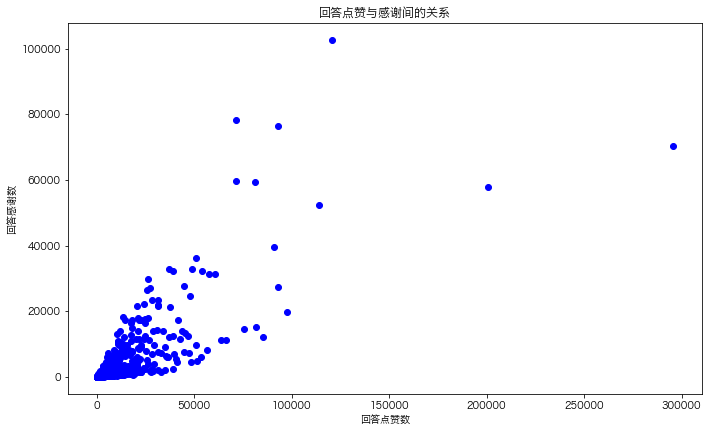

In [31]:
# 调用plt，作散点图
# plt.scatter（横坐标数值，纵坐标数值，颜色，标记符号）
# plt.scatter（横坐标数值，纵坐标数值，颜色，标记符号)
# plt.sbuplot(a,b,c):a:行数，b:列数,c:图形序号
plt.subplot(2,2,1)
plt.scatter(a_x,a_y,color = 'b',marker='o')
# 设置图片标题
plt.title('回答点赞与感谢间的关系')
# 设置横坐标标签
plt.xlabel('回答点赞数')
# 设置纵坐标标签
plt.ylabel('回答感谢数')
# 设置图片大小
plt.rcParams['figure.figsize'] = (25,15)

In [32]:
# task3--提取“task_3.1_zhihu_timeline_answer.csv”中【问题回答数】和【问题关注数】列数据，
# 制成散点图， 观察两者的关系;
b = zhihu_data_answer.loc[:,['问题回答数','问题关注数']]
print(b)

      问题回答数  问题关注数
0      1607  30094
1      2505  57217
2      3527  28092
3      5751  28491
4       500  19048
...     ...    ...
1024    232   5810
1025    809   3309
1026   4929  64602
1027    135   2436
1028    594  18323

[1029 rows x 2 columns]


In [33]:
# 设置横坐标轴
b_x = b['问题回答数'].values.tolist()
print(b_x[:10])

[1607, 2505, 3527, 5751, 500, 636, 14628, 919, 437, 213]


In [34]:
# 设置纵坐标轴
b_y = b['问题关注数'].tolist()
print(b_y[:10])

[30094, 57217, 28092, 28491, 19048, 3814, 129885, 15872, 117434, 3686]


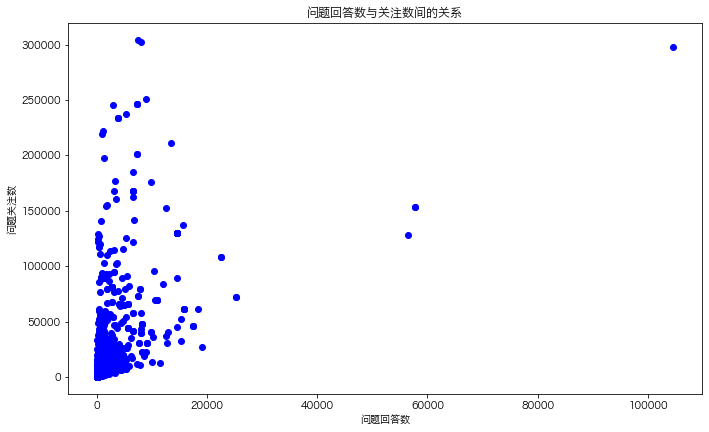

In [35]:
# 调用plt，作散点图
# plt.scatter（横坐标数值，纵坐标数值，颜色，标记符号
plt.subplot(2,2,2)
plt.scatter(b_x,b_y,color = 'b',marker='o')
# 设置图片标题
plt.title('问题回答数与关注数间的关系')
# 设置横坐标标签
plt.xlabel('问题回答数')
# 设置纵坐标标签
plt.ylabel('问题关注数')
# 设置图片大小
plt.rcParams['figure.figsize'] = (25,15)

In [36]:
# task4--读取 CSV 格式文件“task_3.2_zhihu_timeline_article.csv”，
# 将数据命名为 zhihu_data_article，并查看 前部数据;
zhihu_data_article = pd.read_csv('/Users/apple/Desktop/task_3.2_zhihu_timeline_article.csv')
print(zhihu_data_article)

          类型               总 id                     关键词     文章 id  文章点赞数  \
0    article  14_1574825136.990                     李小璐  90620737    774   
1    article  14_1574825137.717                     主持人  90576308  25365   
2    article  13_1574825137.707                      刘涛  92353372    339   
3    article  14_1574825138.917                    网贷风险  83742265    149   
4    article  16_1574825138.573                陈情令（电视剧）  93060585     38   
..       ...                ...                     ...       ...    ...   
491  article  14_1574825320.773                     体制内  77431584    565   
492  article  15_1574825320.715                   香港娱乐圈  90663584    380   
493  article  16_1574825320.248                   加密/解密  93672329      1   
494  article  12_1574825320.700  李小璐 & PG_ONE（2017年末事件）  89556408   1485   
495  article  17_1574825320.876                      家居  88551490    134   

     文章评论数                   文章题目（文章没有感谢数）    文章观看数      文章创建时间  
0      267    “李小璐出轨视

In [37]:
print(zhihu_data_article.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   类型             496 non-null    object
 1   总 id           496 non-null    object
 2   关键词            496 non-null    object
 3   文章 id          496 non-null    int64 
 4   文章点赞数          496 non-null    int64 
 5   文章评论数          496 non-null    int64 
 6   文章题目（文章没有感谢数）  496 non-null    object
 7   文章观看数          496 non-null    int64 
 8   文章创建时间         496 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 35.0+ KB
None


In [38]:
print(zhihu_data_article.describe())

              文章 id         文章点赞数        文章评论数         文章观看数        文章创建时间
count  4.960000e+02    496.000000   496.000000  4.960000e+02  4.960000e+02
mean   8.677374e+07   2598.387097   295.633065  3.008528e+05  1.570314e+09
std    9.691967e+06   5882.901583   548.519490  5.473216e+05  9.563336e+06
min    2.289465e+07      0.000000     0.000000  6.000000e+00  1.476244e+09
25%    8.456310e+07     80.000000    18.500000  1.325450e+04  1.570257e+09
50%    8.944848e+07    512.000000   102.000000  9.642000e+04  1.572499e+09
75%    9.216102e+07   2147.000000   288.000000  3.441048e+05  1.573945e+09
max    9.388997e+07  48556.000000  4529.000000  4.059937e+06  1.574821e+09


In [39]:
print(zhihu_data_article.head())

        类型               总 id       关键词     文章 id  文章点赞数  文章评论数  \
0  article  14_1574825136.990       李小璐  90620737    774    267   
1  article  14_1574825137.717       主持人  90576308  25365   1157   
2  article  13_1574825137.707        刘涛  92353372    339     65   
3  article  14_1574825138.917      网贷风险  83742265    149     90   
4  article  16_1574825138.573  陈情令（电视剧）  93060585     38      1   

                  文章题目（文章没有感谢数）    文章观看数      文章创建时间  
0  “李小璐出轨视频曝光7天后，我识破了令人胆寒的爱情真相”   245037  1573089756  
1     谢娜与董卿同台被“碾压”: 文化断层到底有多可怕?  1072054  1573047546  
2                       刘涛，你够了！   215292  1574051699  
3             因面子，深陷网贷的我，最后这样上岸    63565  1569225309  
4       你是什么样的含光君？浅析剧版与书版蓝忘机的差异     2779  1574349813  


In [40]:
# task5--提取“task_3.2_zhihu_timeline_article.csv”中【文章点赞数】和【文章评论数】列数据，
# 制成散点图， 观察两者的关系
c = zhihu_data_article.loc[:,['文章点赞数','文章评论数']]
print(c)

     文章点赞数  文章评论数
0      774    267
1    25365   1157
2      339     65
3      149     90
4       38      1
..     ...    ...
491    565    148
492    380     65
493      1      0
494   1485    350
495    134     80

[496 rows x 2 columns]


In [41]:
# 设置横坐标
c_x = c.iloc[:,0].tolist()
print(c_x[:10])

[774, 25365, 339, 149, 38, 305, 417, 2864, 2736, 171]


In [42]:
# 设置纵坐标
c_y = c.iloc[:,1].tolist()
print(c_y[:10])

[267, 1157, 65, 90, 1, 200, 48, 234, 95, 15]


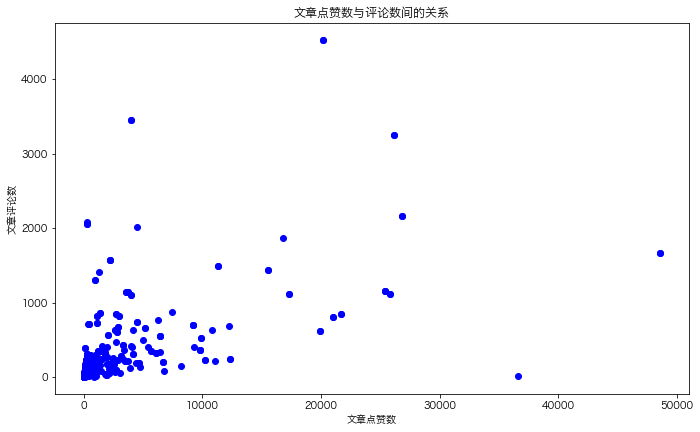

In [43]:
# 调用plt，作散点图
# plt.scatter（横坐标数值，纵坐标数值，颜色，标记符号）
plt.subplot(2,2,3)
plt.scatter(c_x,c_y,color = 'b',marker='o')
# 设置图片标题
plt.title('文章点赞数与评论数间的关系')
# 设置横坐标标签
plt.xlabel('文章点赞数')
# 设置纵坐标标签
plt.ylabel('文章评论数')
# 设置图片大小
plt.rcParams['figure.figsize'] = (25,15)

In [44]:
# task6--提取“task_3.2_zhihu_timeline_article.csv”中【文章点赞数】低于 1000 的行数据，
# 作出箱型图(阅读参 考文章 5)
d = zhihu_data_article[zhihu_data_article['文章点赞数'] < 1000]['文章点赞数']
print(d)
print('-'*30)
print(type(d))

0      774
2      339
3      149
4       38
5      305
      ... 
489    417
491    565
492    380
493      1
495    134
Name: 文章点赞数, Length: 305, dtype: int64
------------------------------
<class 'pandas.core.series.Series'>


In [45]:
d_x = d.tolist()
print(d_x[:10])

[774, 339, 149, 38, 305, 417, 171, 170, 468, 521]


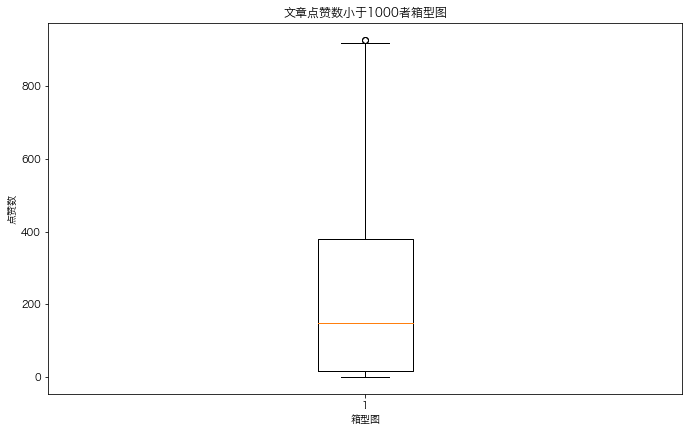

In [46]:
# 调用plt，作箱型图
# plt.boxplot(x)
plt.subplot(2,2,4)
plt.boxplot(d_x)
# 设置图片标题
plt.title('文章点赞数小于1000者箱型图')
# 设置图片横轴标签
plt.xlabel("箱型图")
# 设置图片纵轴标签
plt.ylabel("点赞数")
# 设置图片大小
plt.rcParams['figure.figsize'] = (25,15)
# 展示所有图片，即，4张图合并在一起展示
plt.show()